We are to apply some filters to the input in a way to get a better data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# We define the size of the pictures
WIDTH = 480
HEIGHT = 270
LR = 1e-4
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex-adapted') 
PREV_MODEL = ''
LOAD_MODEL = False
FILE_I_END=1
EPOCHS=1

#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  



In [7]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

In [4]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
from numpy import load

In [5]:
def showarray(a, fmt='jpeg'):
    a_n = np.uint8(np.clip(a, 0, 255))
    try :
        f = io.BytesIO()
        PIL.Image.fromarray(a_n).save(f, fmt)
        display(Image(data=f.getvalue()))
    except:
        #a = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)
        # display image   
        plt.imshow(a)
        plt.show()  

In [27]:
#We load the images of the gameplay
x_training_data=pd.read_pickle("data/dfx-0.pkl")  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle("data/dfy-0.pkl")  
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])

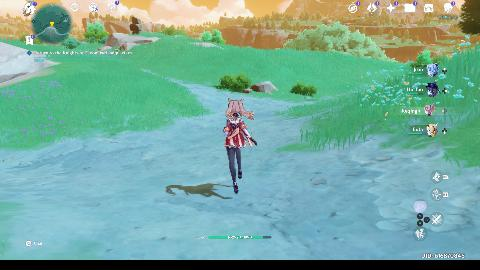

In [15]:
showarray(X_image[3])

In [37]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [64]:
def process_threshold(img):
    # Simple threshold
    ret, processed_img = cv.threshold(img,100,255,cv.THRESH_BINARY) #night/day
    return processed_img

In [76]:
img1=X_image[1]

The format of the image must be np.uint8， instead of .astype(np.uint8) it can be solved by transformation. 
out-of-service .astype("int8")

In [77]:
res_m = img1.astype(np.uint8) 

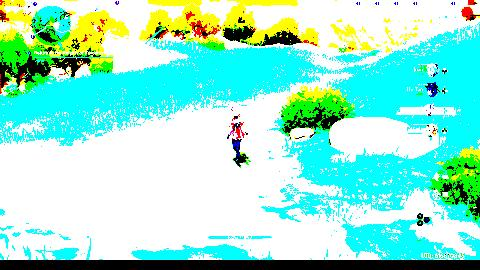

In [78]:
pro_img = process_threshold(res_m)
showarray(pro_img)

In [79]:
def process_threshold_train(img):
    res_m = img.astype(np.uint8) 
    # Simple threshold
    ret, processed_img = cv.threshold(res_m,100,255,cv.THRESH_BINARY) #night/day
    return processed_img

In [80]:
img1=X_image[1]

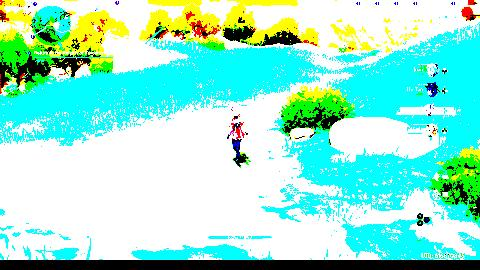

In [81]:
pro_img = process_threshold_train(img1)
showarray(pro_img)

In [82]:
X_image = np.array([process_threshold_train(df_to_numpy_image(X_train,i)) for i in X_train.index])

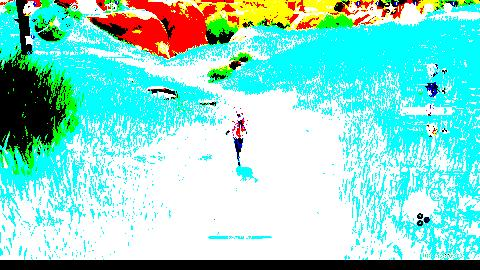

In [91]:
showarray(X_image[8])

In [20]:
def process_black_contour(img):
    image = img
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)   
    #thresh = cv2.threshold(gray,90, 255,cv2.THRESH_BINARY_INV)[1] # only for night
    #thresh = cv2.threshold(gray,200, 255,cv2.THRESH_BINARY_INV)[1] # only for day  
    intensity=parameter(image)
    thresh = cv.threshold(gray,intensity, 255,cv.THRESH_BINARY_INV)[1] # any time or weather
    cnts, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    label = '1'
    count = 0
    # Get inner list of hierarchy
    for layer in zip(cnts, h[0]):
        contour = layer[0]
        hierarchy = layer[1]
        # If we find new contour (not inner) reset label
        if hierarchy[1] >= 0:
            label = '1'
        # Ensure that we only have outer contour
        if count % 2 == 0:
            cv.drawContours(image, [contour], -1, (36, 255, 12), 2)
            x,y,w,h = cv.boundingRect(contour)
            cv.putText(image, label, (x +50,y+ 70), cv.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 3)
            label = str(int(label) * -1)
        count += 1
    return thresh

In [21]:
def parmeterv2(x):
    y=-7.79328704433755e-5*x**3 + 0.0262383299518016*x**2 - 1.50672776260312*x + 77.6895731638604
    return y

In [22]:
def parameter(img):
    #img = cv2.imread('way-night.png')
    #img = cv2.imread('way-day.png')
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    oned=img.ravel()
    #y, x, _ = plt.hist(oned)
    histog=np.histogram(oned)
    y, x = histog[0],histog[1]
    # Get the maximum element from a Numpy array
    y_max = np.amax(y)
    # Get the indices of maximum element in numpy array
    result = np.where(y == np.amax(y))
    position_max=result[0].item()
    x_max=x[position_max]
    #print(x_max)
    #intensity = parmeterv(x_max)
    intensity = parmeterv2(x_max)

    return  intensity

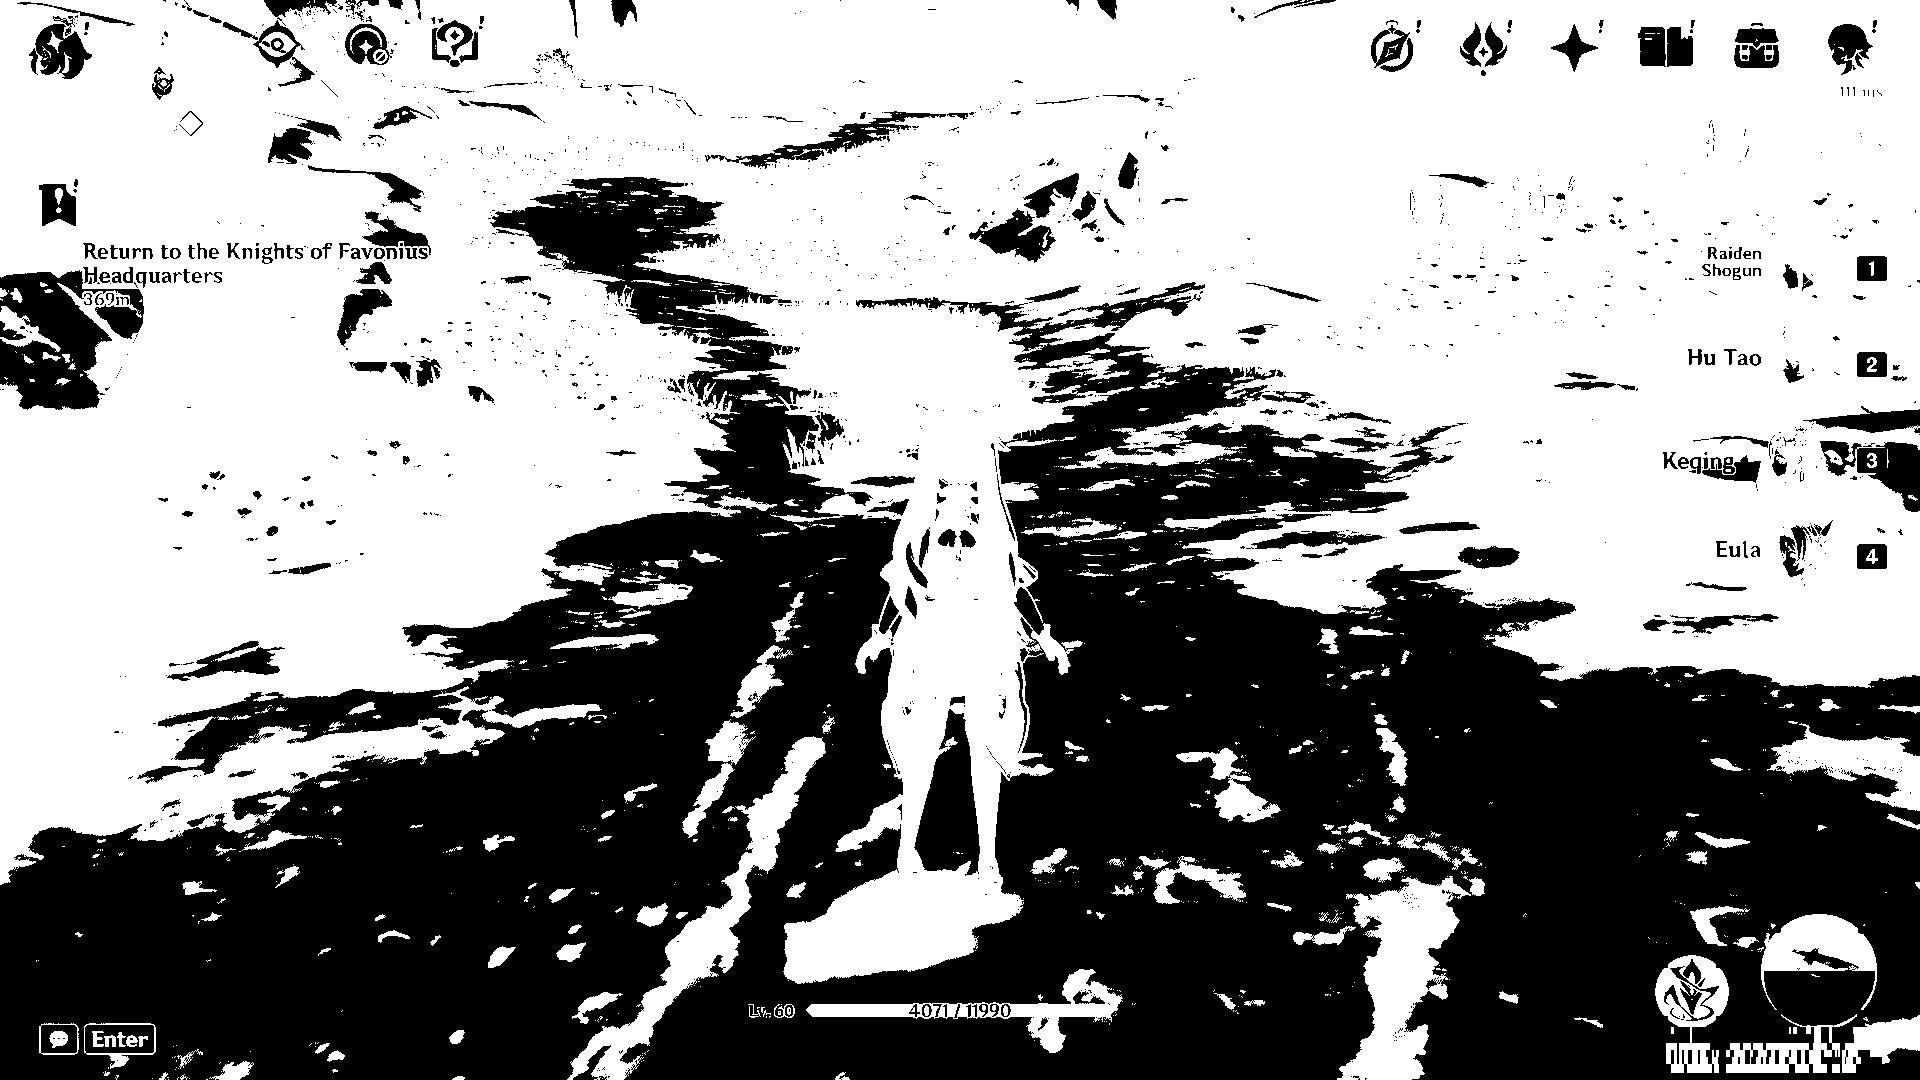

In [25]:
img = cv.imread('way-day.png')
img_prepro_day=process_black_contour(img)
showarray(img_prepro_day)

In [2]:
def intensities(img):
    
    
    #our image type is CV_64F (float64) which is not supported by cvtColor function.
    #wew convert the image to an appropriate type, e.g. float32
    
    img_float32 = np.float32(img)
   # img_float32 = cv.cvtColor(img_float32, cv.COLOR_RGB2HSV)
    gray = cv.cvtColor( img_float32, cv.COLOR_BGR2GRAY)  
    oned=gray.ravel()
    #y, x, _ = plt.hist(oned)
    histog=np.histogram(oned)
    y, x = histog[0],histog[1]
    # Get the maximum element from a Numpy array
    y_max = np.amax(y)
    # Get the indices of maximum element in numpy array
    result = np.where(y == np.amax(y))
    position_max=result[0].item()
    x_max=x[position_max]
    #print(x_max)
    #intensity = parmeterv(x_max)
    intensity = parmeterv2(x_max)
    return  intensity

In [3]:
def process_contour(img):
    image = img
    intensity=intensities(image) 
    img_float32 = np.float32(img)    
    thresh = cv.threshold(img_float32,intensity, 255,cv.THRESH_BINARY_INV)[1] # any time or weather
    return thresh

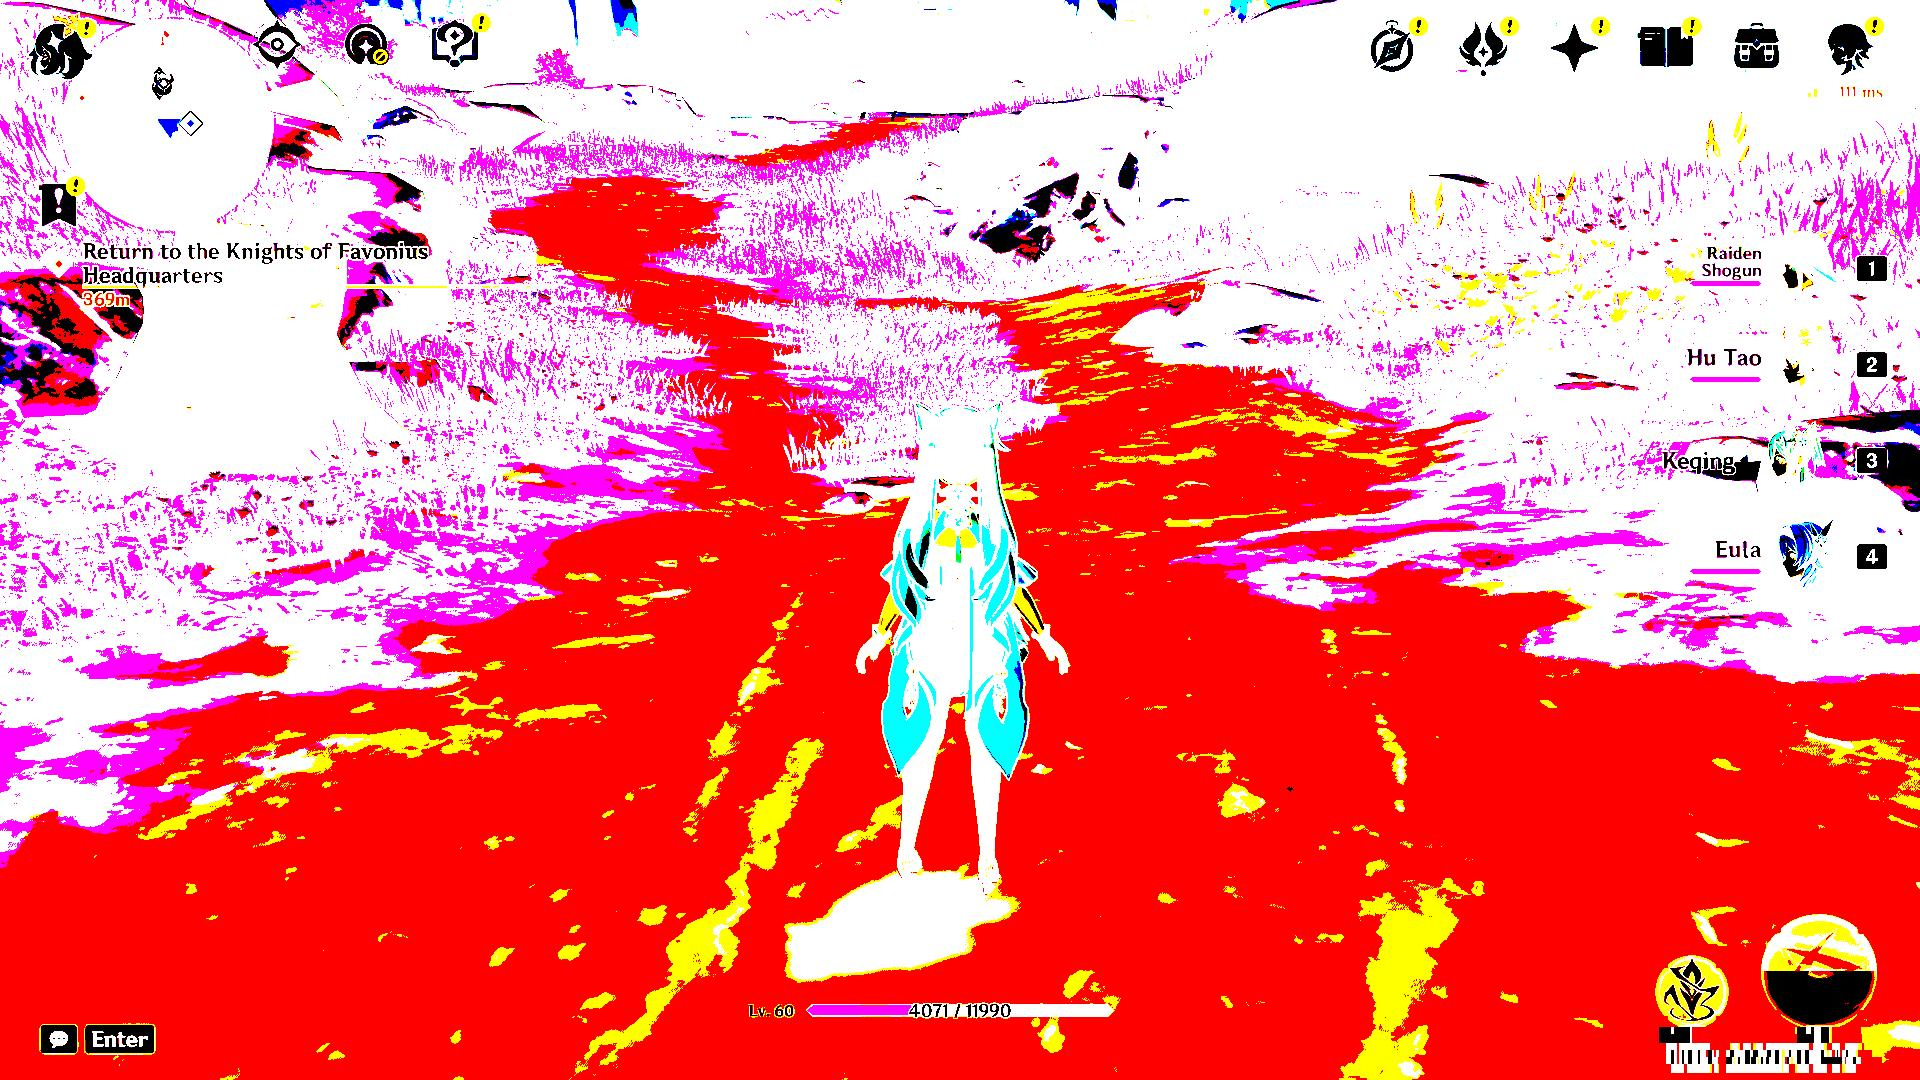

In [7]:
img = cv.imread('way-day.png')
img_prepro_day=process_contour(img)
showarray(img_prepro_day)

In [8]:
img.shape

(1080, 1920, 3)

In [9]:
intensities(img)

200.5468551472636

In [10]:
img11=df_to_numpy_image(X_train,1147)

In [11]:
intensities(img11)

182.2507150033332

In [2]:
X_image = np.array([process_contour(df_to_numpy_image(X_train,i)) for i in X_train.index])

In [13]:
len(X_image)

200

0


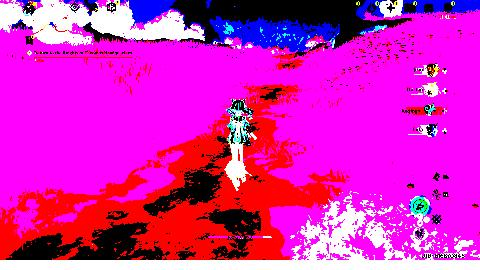

1


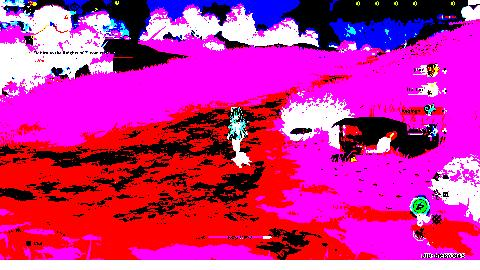

2


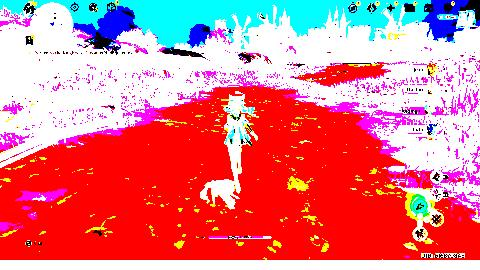

3


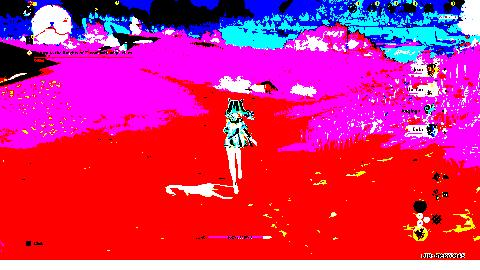

4


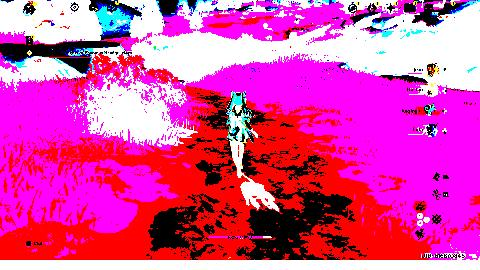

5


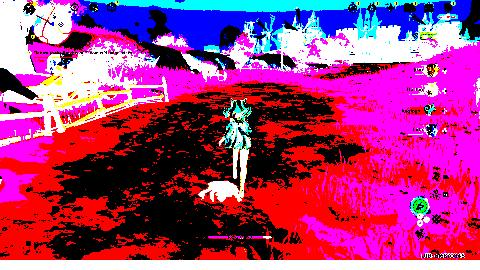

6


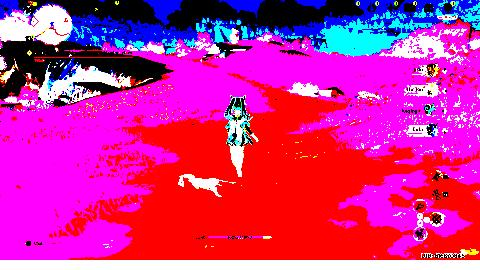

7


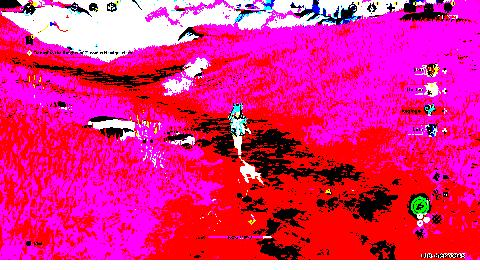

8


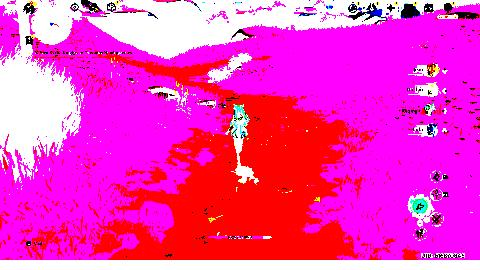

9


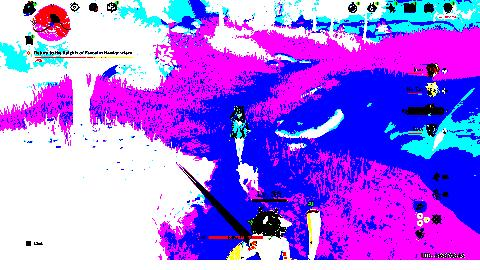

In [6]:
for i in range(10):
    print(i)
    showarray(X_image[i])

# FULL CODE 1 Augmented

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# We define the size of the pictures
WIDTH = 480
HEIGHT = 270
LR = 1e-4
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex-augmented') 
PREV_MODEL = ''
LOAD_MODEL = False
FILE_I_END=1
EPOCHS=1

import cv2 as cv
def process_threshold_train(img):
    res_m = img.astype(np.uint8) 
    # Simple threshold
    ret, processed_img = cv.threshold(res_m,100,255,cv.THRESH_BINARY) #night/day
    return processed_img

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

#Normalization Parameter
Norma        = 29/1000

#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2


#Paramters                          Operation 
filters1     =  roundeven(96*Norma)    #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

dropout13=0.5
dropout15=0.5
learning_rate17=0.001



def alexnet_adapted(width, height, lr, output=29):
    # Building 'AlexNet'                                                               #line
    network = input_data(shape=[None, width, height, 3])                               #0
    network = conv_2d(network, filters1, kernel1, stride1, activation='relu')          #1
    network = max_pool_2d(network, kernel2, strides=stride2 )                          #2
    network = local_response_normalization(network)                                    #3
    network = conv_2d(network, filters3 , kernel3 , activation='relu')                 #4
    network = max_pool_2d(network, kernel4, strides=stride4)                           #5
    network = local_response_normalization(network)                                    #6
    network = conv_2d(network, filters5 , kernel5 , activation='relu')                 #7
    network = conv_2d(network, filters6 , kernel6 , activation='relu')                 #8
    network = conv_2d(network, filters7, kernel7 , activation='relu')                  #9
    network = max_pool_2d(network, kernel8 , strides=stride8 )                         #10
    network = local_response_normalization(network)                                    #11
    network = fully_connected(network, activation9, activation='tanh')                 #12
    network = dropout(network, dropout13)                                              #13
    network = fully_connected(network, activation10, activation='tanh')                #14
    network = dropout(network, dropout15)                                              #15
    network = fully_connected(network, outputs11, activation='softmax')                #16
    network = regression(network, optimizer='momentum',                                #17
                         loss='categorical_crossentropy',
                         learning_rate=learning_rate17)

    # Training
    model = tflearn.DNN(network, checkpoint_path='alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

model = alexnet_adapted(WIDTH, HEIGHT, LR, output=29)

if LOAD_MODEL:
    model.load(PREV_MODEL)
    print('We have loaded a previous model!!!!')
    
# iterates through the training files
for e in range(EPOCHS):
    data_order = [i for i in range(0,FILE_I_END)]
    #shuffle(data_order)
    for count,i in enumerate(data_order):
        try:
            #processed image rgb color - no image filters
            file_name_x = 'data/dfx-{}.pkl'.format(i)
            file_name_y = 'data/dfy-{}.pkl'.format(i)           
            print(file_name_x)
            #We load the images of the gameplay
            x_training_data=pd.read_pickle(file_name_x)  
            #We load the inputs of the of the gameplay
            y_training_data=pd.read_pickle(file_name_y)  
            X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
            # Train Image part ( 4 Dimensional)
            
            X_image = np.array([process_threshold_train(df_to_numpy_image(X_train,i)) for i in X_train.index])
            
            X=X_image.reshape(-1,WIDTH,HEIGHT,3)

            #Train Input part ( 1 Dimensional )
            Y = [df_to_numpy_input(y_train,i) for i in y_train.index]


            # Test Image part ( 4 Dimensional)
            test_image = np.array([process_threshold_train(df_to_numpy_image(X_valid,i)) for i in X_valid.index])
            test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

            ## Test Input part( 1 Dimensional )
            test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

                              
            model.fit(X, Y, n_epoch=100, 
                      validation_set=(test_x,test_y), 
                      shuffle=True,
                      show_metric=True, 
                      batch_size=256, 
                      snapshot_step=50,
                      snapshot_epoch=False, 
                      run_id=MODEL_NAME)
            
            
            
            if count%4 == 0:
                print('SAVING MODEL!')
                model.save(MODEL_NAME)                  
        except Exception as e:
            print(str(e))

# FULL CODE 2 Augmented

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# We define the size of the pictures
WIDTH = 480
HEIGHT = 270
LR = 1e-4
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex-augmented-2') 
PREV_MODEL = ''
LOAD_MODEL = False
FILE_I_END=1
EPOCHS=1

import cv2 as cv

def parmeterv2(x):
    y=-7.79328704433755e-5*x**3 + 0.0262383299518016*x**2 - 1.50672776260312*x + 77.6895731638604
    return y


def intensities(img):
    
    
    #our image type is CV_64F (float64) which is not supported by cvtColor function.
    #wew convert the image to an appropriate type, e.g. float32
    
    img_float32 = np.float32(img)
   # img_float32 = cv.cvtColor(img_float32, cv.COLOR_RGB2HSV)
    gray = cv.cvtColor( img_float32, cv.COLOR_BGR2GRAY)  
    oned=gray.ravel()
    #y, x, _ = plt.hist(oned)
    histog=np.histogram(oned)
    y, x = histog[0],histog[1]
    # Get the maximum element from a Numpy array
    y_max = np.amax(y)
    # Get the indices of maximum element in numpy array
    result = np.where(y == np.amax(y))
    position_max=result[0].item()
    x_max=x[position_max]
    #print(x_max)
    #intensity = parmeterv(x_max)
    intensity = parmeterv2(x_max)
    return  intensity

def process_contour(img):
    image = img
    intensity=intensities(image) 
    img_float32 = np.float32(img)    
    thresh = cv.threshold(img_float32,intensity, 255,cv.THRESH_BINARY_INV)[1] # any time or weather
    return thresh

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

#Normalization Parameter
Norma        = 29/1000

#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2


#Paramters                          Operation 
filters1     =  roundeven(96*Norma)    #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

dropout13=0.5
dropout15=0.5
learning_rate17=0.001



def alexnet_adapted(width, height, lr, output=29):
    # Building 'AlexNet'                                                               #line
    network = input_data(shape=[None, width, height, 3])                               #0
    network = conv_2d(network, filters1, kernel1, stride1, activation='relu')          #1
    network = max_pool_2d(network, kernel2, strides=stride2 )                          #2
    network = local_response_normalization(network)                                    #3
    network = conv_2d(network, filters3 , kernel3 , activation='relu')                 #4
    network = max_pool_2d(network, kernel4, strides=stride4)                           #5
    network = local_response_normalization(network)                                    #6
    network = conv_2d(network, filters5 , kernel5 , activation='relu')                 #7
    network = conv_2d(network, filters6 , kernel6 , activation='relu')                 #8
    network = conv_2d(network, filters7, kernel7 , activation='relu')                  #9
    network = max_pool_2d(network, kernel8 , strides=stride8 )                         #10
    network = local_response_normalization(network)                                    #11
    network = fully_connected(network, activation9, activation='tanh')                 #12
    network = dropout(network, dropout13)                                              #13
    network = fully_connected(network, activation10, activation='tanh')                #14
    network = dropout(network, dropout15)                                              #15
    network = fully_connected(network, outputs11, activation='softmax')                #16
    network = regression(network, optimizer='momentum',                                #17
                         loss='categorical_crossentropy',
                         learning_rate=learning_rate17)

    # Training
    model = tflearn.DNN(network, checkpoint_path='alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

model = alexnet_adapted(WIDTH, HEIGHT, LR, output=29)

if LOAD_MODEL:
    model.load(PREV_MODEL)
    print('We have loaded a previous model!!!!')
    
# iterates through the training files
for e in range(EPOCHS):
    data_order = [i for i in range(0,FILE_I_END)]
    #shuffle(data_order)
    for count,i in enumerate(data_order):
        try:
            #processed image rgb color - no image filters
            file_name_x = 'data/dfx-{}.pkl'.format(i)
            file_name_y = 'data/dfy-{}.pkl'.format(i)           
            print(file_name_x)
            #We load the images of the gameplay
            x_training_data=pd.read_pickle(file_name_x)  
            #We load the inputs of the of the gameplay
            y_training_data=pd.read_pickle(file_name_y)  
            X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
            # Train Image part ( 4 Dimensional)
            
            X_image = np.array([process_contour(df_to_numpy_image(X_train,i)) for i in X_train.index])
            X=X_image.reshape(-1,WIDTH,HEIGHT,3)

            #Train Input part ( 1 Dimensional )
            Y = [df_to_numpy_input(y_train,i) for i in y_train.index]


            # Test Image part ( 4 Dimensional)
            test_image = np.array([process_contour(df_to_numpy_image(X_valid,i)) for i in X_valid.index])
            test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

            ## Test Input part( 1 Dimensional )
            test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

                              
            model.fit(X, Y, n_epoch=100, 
                      validation_set=(test_x,test_y), 
                      shuffle=True,
                      show_metric=True, 
                      batch_size=256, 
                      snapshot_step=50,
                      snapshot_epoch=False, 
                      run_id=MODEL_NAME)
            
            
            
            if count%4 == 0:
                print('SAVING MODEL!')
                model.save(MODEL_NAME)                  
        except Exception as e:
            print(str(e))

Training Step: 99  | total loss: 1.41065 | time: 0.165s
| Momentum | epoch: 099 | loss: 1.41065 - acc: 0.5194 -- iter: 200/200
Training Step: 100  | total loss: 1.41018 | time: 1.220s
| Momentum | epoch: 100 | loss: 1.41018 - acc: 0.5200 | val_loss: 1.40019 - val_acc: 1.0000 -- iter: 200/200
--
SAVING MODEL!


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# We define the size of the pictures
WIDTH = 480
HEIGHT = 270
LR = 1e-4
MODEL_NAME = 'mmorpg-{}-{}.model'.format(LR, 'alex-augmented-3') 
PREV_MODEL = ''
LOAD_MODEL = False
FILE_I_END=1
EPOCHS=1

import cv2 as cv

def parmeterv(x):
    y= 0.8660735375167304*x + 23.147783639083652
    return y


def intensities(img):
    
    
    #our image type is CV_64F (float64) which is not supported by cvtColor function.
    #wew convert the image to an appropriate type, e.g. float32
    
    img_float32 = np.float32(img)
    #img_float32 = cv.cvtColor(img_float32, cv.COLOR_RGB2HSV)
    gray = cv.cvtColor( img_float32, cv.COLOR_BGR2GRAY)  
    oned=gray.ravel()
    #y, x, _ = plt.hist(oned)
    histog=np.histogram(oned)
    y, x = histog[0],histog[1]
    # Get the maximum element from a Numpy array
    y_max = np.amax(y)
    # Get the indices of maximum element in numpy array
    result = np.where(y == np.amax(y))
    position_max=result[0].item()
    x_max=x[position_max]
    #print(x_max)
    intensity = parmeterv(x_max)
    #intensity = parmeterv2(x_max)
    return  intensity

def process_contour(img):
    image = img
    intensity=intensities(image) 
    img_float32 = np.float32(img)    
    thresh = cv.threshold(img_float32,intensity, 255,cv.THRESH_BINARY_INV)[1] # any time or weather
    return thresh

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr

def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr

#Normalization Parameter
Norma        = 29/1000

#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2


#Paramters                          Operation 
filters1     =  roundeven(96*Norma)    #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

dropout13=0.6
dropout15=0.6
learning_rate17=0.001



def alexnet_adapted(width, height, lr, output=29):
    # Building 'AlexNet'                                                               #line
    network = input_data(shape=[None, width, height, 3])                               #0
    network = conv_2d(network, filters1, kernel1, stride1, activation='relu')          #1
    network = max_pool_2d(network, kernel2, strides=stride2 )                          #2
    network = local_response_normalization(network)                                    #3
    network = conv_2d(network, filters3 , kernel3 , activation='relu')                 #4
    network = max_pool_2d(network, kernel4, strides=stride4)                           #5
    network = local_response_normalization(network)                                    #6
    network = conv_2d(network, filters5 , kernel5 , activation='relu')                 #7
    network = conv_2d(network, filters6 , kernel6 , activation='relu')                 #8
    network = conv_2d(network, filters7, kernel7 , activation='relu')                  #9
    network = max_pool_2d(network, kernel8 , strides=stride8 )                         #10
    network = local_response_normalization(network)                                    #11
    network = fully_connected(network, activation9, activation='tanh')                 #12
    network = dropout(network, dropout13)                                              #13
    network = fully_connected(network, activation10, activation='tanh')                #14
    network = dropout(network, dropout15)                                              #15
    network = fully_connected(network, outputs11, activation='softmax')                #16
    network = regression(network, optimizer='momentum',                                #17
                         loss='categorical_crossentropy',
                         learning_rate=learning_rate17)

    # Training
    model = tflearn.DNN(network, checkpoint_path='alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

model = alexnet_adapted(WIDTH, HEIGHT, LR, output=29)

if LOAD_MODEL:
    model.load(PREV_MODEL)
    print('We have loaded a previous model!!!!')
    
# iterates through the training files
for e in range(EPOCHS):
    data_order = [i for i in range(0,FILE_I_END)]
    #shuffle(data_order)
    for count,i in enumerate(data_order):
        try:
            #processed image rgb color - no image filters
            file_name_x = 'data/dfx-{}.pkl'.format(i)
            file_name_y = 'data/dfy-{}.pkl'.format(i)           
            print(file_name_x)
            #We load the images of the gameplay
            x_training_data=pd.read_pickle(file_name_x)  
            #We load the inputs of the of the gameplay
            y_training_data=pd.read_pickle(file_name_y)  
            X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
            # Train Image part ( 4 Dimensional)
            
            X_image = np.array([process_contour(df_to_numpy_image(X_train,i)) for i in X_train.index])
            X=X_image.reshape(-1,WIDTH,HEIGHT,3)

            #Train Input part ( 1 Dimensional )
            Y = [df_to_numpy_input(y_train,i) for i in y_train.index]


            # Test Image part ( 4 Dimensional)
            test_image = np.array([process_contour(df_to_numpy_image(X_valid,i)) for i in X_valid.index])
            test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)

            ## Test Input part( 1 Dimensional )
            test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

                              
            model.fit(X, Y, n_epoch=200, 
                      validation_set=(test_x,test_y), 
                      shuffle=True,
                      show_metric=True, 
                      batch_size=256, 
                      snapshot_step=50,
                      snapshot_epoch=False, 
                      run_id=MODEL_NAME)
            
            
            
            if count%4 == 0:
                print('SAVING MODEL!')
                model.save(MODEL_NAME)                  
        except Exception as e:
            print(str(e))

Training Step: 199  | total loss: 1.39363 | time: 0.166s
| Momentum | epoch: 199 | loss: 1.39363 - acc: 0.5458 -- iter: 200/200
Training Step: 200  | total loss: 1.39364 | time: 1.210s
| Momentum | epoch: 200 | loss: 1.39364 - acc: 0.5482 | val_loss: 1.39428 - val_acc: 1.0000 -- iter: 200/200
--
SAVING MODEL!
